In [1]:
from sympy import *
init_printing()

In [3]:
x, v, theta, omega = symbols("x v \\theta, \\omega")
s = Matrix([x, v, theta, omega])
s.T

[x  v  \theta  \omega]

In [5]:
u = symbols("u")
ds = Matrix([v, u, omega, sin(theta) - u*cos(theta)])
ds.T

[v  u  \omega  -u⋅cos(\theta) + sin(\theta)]

In [6]:
alpha = symbols("alpha")
L = alpha*u + (1-alpha)*u**2
L

In [33]:
slb = Matrix([symbols("{}_l".format(var)) for var in s])
sub = Matrix([symbols("{}_u".format(var)) for var in s])
ulb, uub = symbols("u_l u_u")
t, tlb, tub = symbols("t t_l t_u")
b = Matrix([*s-sub, *slb-s, u-uub, ulb-u, t-tub, tlb-t])
b

⎡     x - xᵤ      ⎤
⎢                 ⎥
⎢     v - vᵤ      ⎥
⎢                 ⎥
⎢\theta - \thetaᵤ ⎥
⎢                 ⎥
⎢\omega - \omegaᵤ ⎥
⎢                 ⎥
⎢     -x + xₗ     ⎥
⎢                 ⎥
⎢     -v + vₗ     ⎥
⎢                 ⎥
⎢-\theta + \thetaₗ⎥
⎢                 ⎥
⎢-\omega + \omegaₗ⎥
⎢                 ⎥
⎢     u - uᵤ      ⎥
⎢                 ⎥
⎢     -u + uₗ     ⎥
⎢                 ⎥
⎢     t - tᵤ      ⎥
⎢                 ⎥
⎣     -t + tₗ     ⎦

In [8]:
l = Matrix([symbols("\\lambda_{}".format(var)) for var in s])
l.T

[\lambdaₓ  \lambdaᵥ  \lambda_\theta  \lambda_\omega]

In [39]:
mu = Matrix([symbols("\\mu_{{{}}}".format(i)) for i in range(len(b))])
mu

⎡\mu_{0} ⎤
⎢        ⎥
⎢\mu_{1} ⎥
⎢        ⎥
⎢\mu_{2} ⎥
⎢        ⎥
⎢\mu_{3} ⎥
⎢        ⎥
⎢\mu_{4} ⎥
⎢        ⎥
⎢\mu_{5} ⎥
⎢        ⎥
⎢\mu_{6} ⎥
⎢        ⎥
⎢\mu_{7} ⎥
⎢        ⎥
⎢\mu_{8} ⎥
⎢        ⎥
⎢\mu_{9} ⎥
⎢        ⎥
⎢\mu_{10}⎥
⎢        ⎥
⎣\mu_{11}⎦

In [40]:
H = L + l.dot(ds) + mu.dot(b)
H

In [44]:
dl = -H.diff(s)
dl

⎡                       -\mu_{0} + \mu_{4}                        ⎤
⎢                                                                 ⎥
⎢                  -\lambdaₓ - \mu_{1} + \mu_{5}                  ⎥
⎢                                                                 ⎥
⎢-\lambda_\omega⋅(u⋅sin(\theta) + cos(\theta)) - \mu_{2} + \mu_{6}⎥
⎢                                                                 ⎥
⎣               -\lambda_\theta - \mu_{3} + \mu_{7}               ⎦

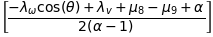

In [46]:
solve(H.diff(u), u)